In [36]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
with open("dataset\sarcasm.json", 'r') as f:
    dataset = json.load(f)


In [10]:
dataset

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [11]:
len(dataset)

26709

In [21]:
vocab_size= 1000
embedding_dim = 16
max_length = 120

trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000
testing_size = 709

In [22]:
# Buat list untuk menyimpan
kalimat = []
label = []
# Ambil setiap kalimat dan label ke dalam list
for item in dataset:
    kalimat.append(item['headline'])
    label.append(item['is_sarcastic'])

In [23]:
kalimat_training = kalimat[:training_size]
kalimat_validation = kalimat[training_size:testing_size]
kalimat_testing = kalimat[testing_size:]

In [24]:
label_training = label[:training_size]
label_validation = label[training_size:testing_size]
label_testing = label[testing_size:]

In [29]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(kalimat_training)

training_sequence = tokenizer.texts_to_sequences(kalimat_training)
training_padding = pad_sequences(training_sequence, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

validation_sequence = tokenizer.texts_to_sequences(kalimat_validation)
validation_padding = pad_sequences(validation_sequence, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

testing_sequence = tokenizer.texts_to_sequences(kalimat_testing)
testing_padding = pad_sequences(testing_sequence, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

In [30]:
label_training = np.array(label_training)
label_validation = np.array(label_validation)
label_testing = np.array(label_testing)

In [31]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model_lstm.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [34]:
history_lstm = model_lstm.fit(training_padding, label_training, epochs=10,
validation_data=(testing_padding, label_testing))

Epoch 1/10
625/625 [==============================] - 20s 29ms/step - loss: 0.4725 - accuracy: 0.7630 - val_loss: 0.3716 - val_accuracy: 0.8308
Epoch 2/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3703 - accuracy: 0.8293 - val_loss: 0.3548 - val_accuracy: 0.8394
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3555 - accuracy: 0.8368 - val_loss: 0.3492 - val_accuracy: 0.8424
Epoch 4/10
625/625 [==============================] - 19s 30ms/step - loss: 0.3441 - accuracy: 0.8452 - val_loss: 0.3411 - val_accuracy: 0.8465
Epoch 5/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3372 - accuracy: 0.8482 - val_loss: 0.3307 - val_accuracy: 0.8516
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3250 - accuracy: 0.8543 - val_loss: 0.3265 - val_accuracy: 0.8536
Epoch 7/10
625/625 [==============================] - 18s 30ms/step - loss: 0.3154 - accuracy: 0.8580 - val_loss: 0.3234 - val_accuracy:

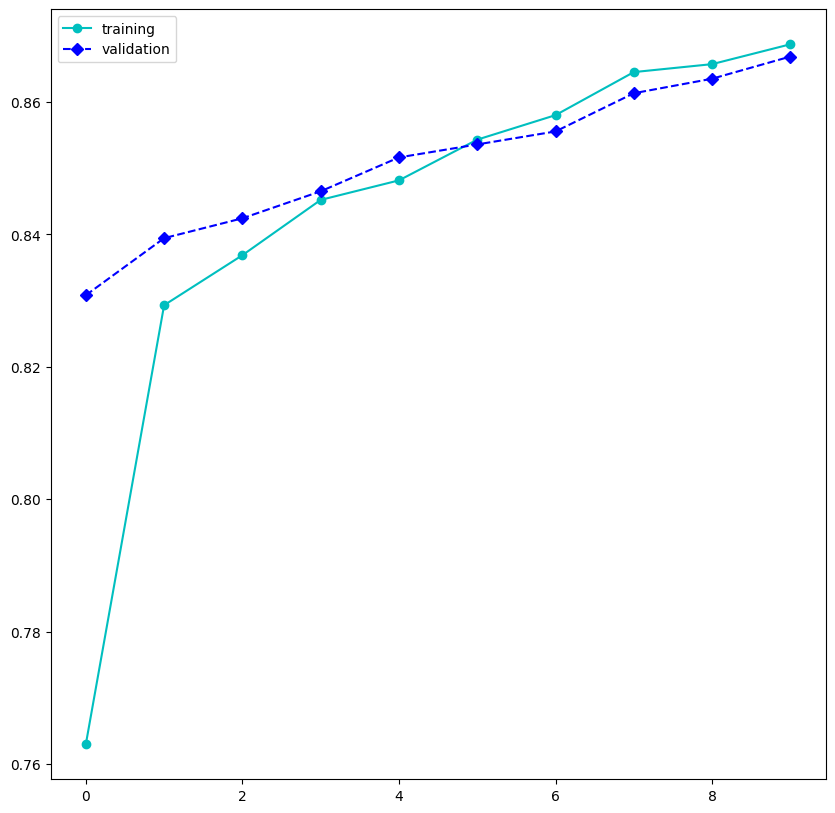

In [40]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history_lstm.history['accuracy'])), 
         history_lstm.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history_lstm.history['val_accuracy'])), 
         history_lstm.history['val_accuracy'],
         'bD--',
         label='validation')
plt.legend()
plt.show()

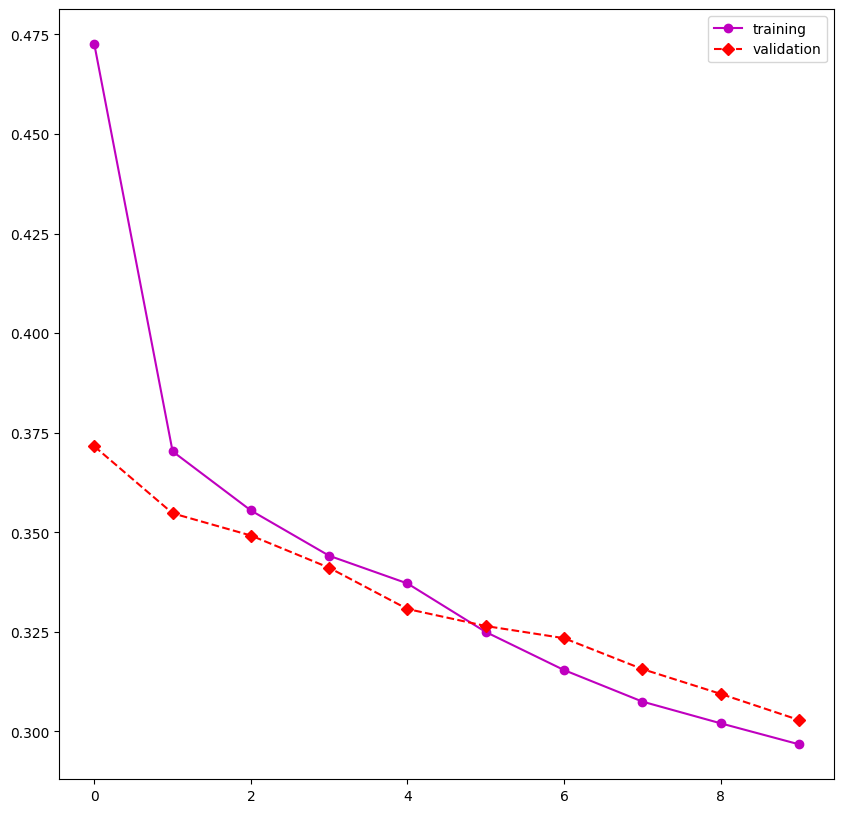

In [42]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history_lstm.history['loss'])), 
         history_lstm.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history_lstm.history['val_loss'])), 
         history_lstm.history['val_loss'],
         'rD--',
         label='validation')
plt.legend()
plt.show()